In [2]:
 # %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
location_dict = {'a': "C:\\Users\\BMH_work\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",
                 'c': "C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data", 'd':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colormap as cm
#from matplotlib_venn import venn2
#for my windows10 laptop I had to install this package using pip rather than anaconda.  
import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
import pickle
#import subprocess
#import networkx as nx
import scipy.stats as stats
#import statsmodels.api as sm
#import scipy.spatial.distance as spd
#import statsmodels.graphics.gofplots as stats_graph
#import scipy.cluster.hierarchy as sch

from Bio import SeqIO
from Bio import pairwise2
#from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq
#import gffutils

import re

from collections import Counter
# import scipy.stats as stats
from itertools import chain
#from itertools import product
#this only works if you are online
online_input = input("are you online? Yes/No ")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# # for phylogenetic trees: 
# from ete3 import Tree, SeqMotifFace, TreeStyle, add_face_to_node  #the last three are for visualization
# # In order to view ete3 created trees on the gpucluster, you need to use a virtual X server:
# from pyvirtualdisplay import Display
# display = Display(visible=False, size=(1024, 768), color_depth=24)
# display.start()
#ete3 is not officially supported on windows, and so must be loaded via pip: 
# pip install -U https://github.com/etetoolkit/ete/archive/qt5.zip
# ref: https://groups.google.com/forum/#!topic/etetoolkit/6NblSBPij4o

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

spec_lookup = {'Klac' : 'Kluyveromyces lactis', 'Scer': 'Saccharomyces cerevisiae', 
 'Cgla' : 'Candida glabrata' , 'Ncas': 'Naumovozyma castellii', 
 'Sbay' : 'Saccharomyces bayanus', 'Smik': 'Saccharomyces mikatae',
 'Lwal' : 'Lachancea waltii', 'Spar' : 'Saccharomyces paradoxus', 
 'Lklu' : 'Lachancea kluyverii', 'Dhan': 'Debaryomyces hansenii', 
 'Calb' : 'Candida albicans', 'Ylip': 'Yarrowia lipolytica'}  

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/expression_broad_data
Added /home/heineike/github/expression_broad_data to path: 
['', '/home/lab/envs/seqanalysis/lib/python35.zip', '/home/lab/envs/seqanalysis/lib/python3.5', '/home/lab/envs/seqanalysis/lib/python3.5/plat-linux', '/home/lab/envs/seqanalysis/lib/python3.5/lib-dynload', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/argh-0.26.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/glob2-0.4.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/mmtf_python-1.0.2-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/IPython/extensions', '/home/heineike/.ipython', '/home/heineike/github/expression_broad_data']
I am about to import a library
I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's

In [3]:
#Set up orth dir variables

orth_dir_YGOB =  data_processing_dir + "ortholog_files_YGOB" + os.sep

orth_dir_regev = data_processing_dir + "ortholog_files_regev" + os.sep


## Build Vpol map to non YGOB species

In [ ]:
#ONly need to do this once - building ortholog files for Vpol to ['Dhan', 'Calb', 'Ylip', 'Sjap','Spom']
#via Vpol-Lklu from YGOB and Lklu-spec for each species

# for spec in ['Lwal','Dhan',  'Calb', 'Ylip', 'Sjap','Spom']: 
    
#     self_spec = 'Vpol'

#     spec_via = 'Lklu'

#     #read in self to spec_via data

#     orth_dir_YGOB = data_processing_dir + 'ortholog_files_YGOB' + os.sep 

#     self_via = io_library.read_orth_lookup_table(self_spec, spec_via, orth_dir_YGOB)

#     # for this ortholog mapping from YGOB there is only one Lklu gene for any Vpol gene

#     # for self_gene, via_genes in self_via.items():
#     #     if len(via_genes)>1:
#     #         print(self_gene)
#     #         print(via_genes)

#     #read in spec_via to spec data

#     orth_dir = data_processing_dir + 'ortholog_files' + os.sep 

#     via_spec = io_library.read_orth_lookup_table(spec_via, spec, orth_dir)

#     orth_lookup_outputfname = os.path.normpath(data_processing_dir + 'ortholog_files/' + self_spec + "-" + spec + "-orthologs.txt"  )

#     # print(orth_lookup_outputfname)
#     with open(orth_lookup_outputfname, 'w') as fw:

#         for self_gene, via_genes in self_via.items():
#             if len(via_genes)>1:
#                 print('There are ' + str(len(via_genes)) + ' '+ spec_via + ' genes listed for ' + self_spec + 'gene ' + self_gene)
#                 print(via_genes)
#             elif via_genes[0]=='NONE':
#                 spec_genes = ['NONE']
#             else: 
#                 via_gene = via_genes[0]
#                 if via_gene in via_spec.keys():
#                     spec_genes = via_spec[via_gene]
#                 else:
#                     print(via_gene + ' not in ortholog lookup')
#                     spec_genes = ['NONE']
#             fw.write(self_gene + '\t' + '\t'.join(spec_genes) + '\n')
#     print(orth_lookup_outputfname + ' complete')
  

In [18]:
#Vpol to Lwal: make from YGOB pillars, then remove underline for regev data
#Smik to Smik: remove underline from regev side

#load Vpol to Lwal from YGOB

spec1 = 'Smik_YGOB'
spec2 = 'Smik_regev'
orth_dir_in = orth_dir_regev
orth_dir_out = orth_dir_regev

spec1_spec2_YGOB = io_library.read_orth_lookup_table(spec1,spec2, orth_dir_in)


#Remove first underscore from Lwal 
spec1_spec2_regev = {}
for spec1_gene, spec2_genes in spec1_spec2_YGOB.items():
    if spec2_genes[0]=='NONE':
        spec1_spec2_regev[spec1_gene] = ['NONE']
    else: 
        spec2_genes_regev = []
        for spec2_gene in spec2_genes: 
            #remove only the first underscore
            spec2_gene_regev = spec2_gene.split('_')[0] + '_'.join(spec2_gene.split('_')[1:])
            spec2_genes_regev.append(spec2_gene_regev)
        spec1_spec2_regev[spec1_gene] = spec2_genes_regev
spec1_spec2_regev

#Save again in regev data folder
orth_lookup_outputfname = os.path.normpath(orth_dir_out + spec1 + "-" + spec2 + "-orthologs.txt"  )

io_library.print_ortholog_file(orth_lookup_outputfname, spec1_spec2_regev)

## Look for amino acid matches between YGOB and Regev genenames

In [48]:
# #Only need to do once
# #Gets AA sequence from YGOB genome.tab and sequence.fas file and deposits them 
# #in a file.
# #only works on gpucluster right now because that's where the genomes are

# specs = ['Suva', 'Smik', 'Lwal', 'Ncas', 'Klac']

# for spec in specs: 
#     io_library.ygob_AA_extract(spec)

#At least one bad sequence in Ncas chromosome 1
#At least one bad sequence in suva_Chr_2
#At least one bad sequence in Klac chromosome 1

I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/expression_broad_data
data processing dir is /home/heineike/github/expression_broad_data/expression_data/
Suva
scaffold: suva_Chr_1
scaffold: suva_Chr_2


/home/lab/envs/seqanalysis/lib/python3.5/site-packages/Bio/Seq.py:2309: BiopythonWarning:

Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.



scaffold: suva_Chr_3
scaffold: suva_Chr_4
scaffold: suva_Chr_5
scaffold: suva_Chr_6
scaffold: suva_Chr_7
scaffold: suva_Chr_8
scaffold: suva_Chr_9
scaffold: suva_Chr_10
scaffold: suva_Chr_11
scaffold: suva_Chr_12
scaffold: suva_Chr_13
scaffold: suva_Chr_14
scaffold: suva_Chr_15
scaffold: suva_Chr_16
scaffold: suva_Chr_17
scaffold: suva_Chr_18
scaffold: suva_Chr_19
scaffold: suva_Chr_20
scaffold: suva_Chr_21
scaffold: suva_Chr_22
scaffold: suva_Chr_23
scaffold: suva_Chr_24
scaffold: suva_Chr_25
scaffold: suva_Chr_26
scaffold: suva_Chr_27
scaffold: suva_Chr_28
scaffold: suva_Chr_29
scaffold: suva_Chr_30
scaffold: suva_Chr_31
scaffold: suva_Chr_32
scaffold: suva_Chr_33
scaffold: suva_Chr_34
scaffold: suva_Chr_35
scaffold: suva_Chr_36
scaffold: suva_Chr_37
scaffold: suva_Chr_38
scaffold: suva_Chr_39
scaffold: suva_Chr_40
scaffold: suva_Chr_41
scaffold: suva_Chr_42
scaffold: suva_Chr_43
scaffold: suva_Chr_44
scaffold: suva_Chr_45
scaffold: suva_Chr_46
scaffold: suva_Chr_47
scaffold: suva_Ch

In [33]:
#Find matches using genome search

study1 = 'regev'
study2 = 'YGOB'

spec = 'Ncas'

use_subset = True
subset = set(ambiguous_list_flat)
pairwise_score_loaded = True

#Just load second one into 
#Check timing with time module
#python parallel programming library
#ipy_parallel dask
#https://ipyparallel.readthedocs.io/en/stable/development/messages.html#parallel-messages

#All by all blast, output top NN results

AA_seqs_fnames = {'regev': data_processing_dir + os.path.normpath('ortholog_files_regev/AA_lists/' + spec + '_AA_list.fasta'), 
                  'YGOB' : data_processing_dir + os.path.normpath('ortholog_files_YGOB/AA_lists/' + spec + '_AA_list.fasta')
                 }


pairwise_score_loaded = False

genenames_study1 = []
AA_seqs_study1 = SeqIO.parse(AA_seqs_fnames[study1], "fasta")
for seq_study1 in AA_seqs_study1: 
    genename_study1 = seq_study1.id
    genenames_study1.append(genename_study1)

if use_subset: 
    print('Using Subset genes')
else: 
    subset = set(genenames_study1)
    
if pairwise_score_loaded: 
    genes_to_search = ((subset & set(genenames_study1)) - set(pairwise_score.keys()))
else: 
    pairwise_score = {}
    genes_to_search = (subset & set(genenames_study1))


match_points = 1
mismatch_points = -1
gap_open = -.5
gap_extension = -0.1
NN_top_scores = 5


AA_seqs_study1 = SeqIO.parse(AA_seqs_fnames[study1], "fasta")

N = len(genes_to_search)
for seq_study1 in AA_seqs_study1: 
    check_gene = False
    genename_study1 = seq_study1.id
    if (pairwise_score_loaded | use_subset):   #checks if gene is in genes tosearch list if either pairwise_score already has been initialized or if we are using a subset of genes
        if genename_study1 in genes_to_search:
            check_gene = True
    else: 
        check_gene=True
        
    if check_gene: 
        print(str(N) + ' ' + genename_study1)
        AA_seqs_study2 = SeqIO.parse(AA_seqs_fnames[study2], "fasta")
        pairwise_score_comps = {}
        for seq_study2 in AA_seqs_study2: 
            genename_study2 = seq_study2.id
            score = pairwise2.align.globalms(seq_study2,seq_study1, match_points, mismatch_points, gap_open, gap_extension, penalize_end_gaps = False, score_only = True )
            pairwise_score_comps[genename_study2] = score
        pairwise_score_comps_df = pd.Series(pairwise_score_comps)
        pairwise_score[genename_study1] = pairwise_score_comps_df.sort_values(ascending=False).iloc[0:NN_top_scores]
        #print(pairwise_score[genename_YGOB])
        N = N - 1



Using Subset genes
151 Scas296.1
150 Scas296.2
149 Scas4.1
148 Scas402.1
147 Scas418.1
146 Scas452.1
145 Scas471.1
144 Scas476.4
143 Scas479.2
142 Scas479.4
141 Scas485.3d
140 Scas485.4
139 Scas488.3
138 Scas496.4
137 Scas499.1
136 Scas50.0d
135 Scas503.4
134 Scas517.1d
133 Scas522.4
132 Scas523.1
131 Scas525.5
130 Scas526.5
129 Scas534.1
128 Scas535.1
127 Scas535.2
126 Scas537.0d
125 Scas539.1
124 Scas547.4
123 Scas553.1
122 Scas554.4
121 Scas558.0d
120 Scas561.5d2
119 Scas568.1
118 Scas570.12
117 Scas573.1
116 Scas591.6
115 Scas592.4
114 Scas593.6
113 Scas597.15d
112 Scas599.14
111 Scas599.15
110 Scas604.1
109 Scas604.10
108 Scas606.17
107 Scas609.2
106 Scas609.4
105 Scas610.4
104 Scas611.9d
103 Scas617.8
102 Scas617.9
101 Scas618.9
100 Scas622.1
99 Scas623.17d
98 Scas623.9
97 Scas624.4
96 Scas627.15
95 Scas627.17d
94 Scas627.8
93 Scas628.14
92 Scas629.24
91 Scas630.3
90 Scas631.0d
89 Scas632.10
88 Scas632.12
87 Scas634.7
86 Scas635.13
85 Scas635.2
84 Scas635.8d
83 Scas636.14d
82 Sca

In [35]:
#Save pairwise_score dictionary
orth_dir = orth_dir_regev
pairwise_score_fname = orth_dir + os.path.normpath("AA_lists/" + spec + "_pairwise_score.pkl")

with open(pairwise_score_fname,'wb') as file: 
    pickle.dump(pairwise_score, file)

Identifying mismatches between K.Lac regev orthologs and K.Lac YGOB orthologs

The main problem is that the regev microarray data had a number of labels that don't match the reference labels (which is what YGOB uses). This is mainly on the E chromosome.  At first I thought it was just a simple shift - 1 or 10 off of the actual number, but after looking at KLLA0E19767 in the regev data (which maps to KLLA0E19669 in the YGOB/NCBI data) and KLLA0E19855g) (maps to KLLA0E19757) it looks like it isn't that simple (those are 98 apart in both cases) 

This isn't a problem when I go from S.Cer to K.Lac (because regev provided an ortholog file and based on protein sequence similarity it looks like that is internally consistent), but it is a problem for reporting those results using K.Lactis indices. 

(Need a regev to YGOB map to report K.Lac genes from that data)


It is also a problem going from Vpol to K.Lac because regev didn't have a map, so the vpol mapping from YGOB to regev data misses a bunch of proteins on the E chromosome.  

(Need a YGOB to regev map to look up data for K.Lac orthologs of V.pol) 



So...

I need to identify genes in each set that don't match and then do protein sequence comparisons. 


In [ ]:
# Identify Genes that don't match between YGOB and Regev K.Lac data

#Load YGOB KLAC list
orth_dir_YGOB =  data_processing_dir + "ortholog_files_YGOB" + os.sep

kl_lookup_YGOB = io_library.read_orth_lookup_table('Klac','Scer', orth_dir_YGOB)
kl_genes_YGOB = set(kl_lookup_YGOB.keys())

#Load regev Klac list
orth_dir_regev = data_processing_dir + "ortholog_files_regev" + os.sep

kl_lookup_regev = io_library.read_orth_lookup_table('Klac','Scer', orth_dir_regev)
kl_genes_regev = set(kl_lookup_regev.keys())

#Print files into .txt
with open(orth_dir_regev + os.sep + 'Klac_regev_not_YGOB.txt','w') as f:
    for gene in list(kl_genes_regev-kl_genes_YGOB):
        f.write(gene + '\n')
    
with open(orth_dir_regev + os.sep + 'Klac_YGOB_not_regev.txt','w') as f:
    for gene in list(kl_genes_YGOB-kl_genes_regev):
        f.write(gene + '\n')

In [ ]:
#There is not a single gene on the K.Lac E chromosome that matches between datasets (a bit surprising to me at first glance)
for gene in list(kl_genes_regev & kl_genes_YGOB):
    if gene.split('0')[1][0]=='E':
        print(gene)

In [ ]:
#The subset of genes to lookup for K.Lac YGOB is
kl_genes_YGOB-kl_genes_regev

#and vice versa for K.Lac regev
kl_genes_regev-kl_genes_YGOB

## For Pairwise score data, make ortholog file

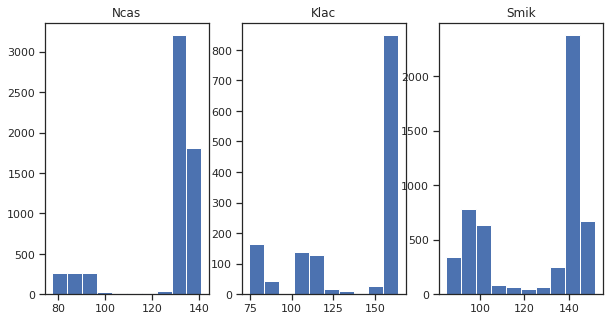

In [68]:
## Show histogram of the pairwise scores and use it to choose thresholds: 

fig, axarr = plt.subplots(1,3, figsize=(10,5))

#pairwise_scores = {}
for jj, spec in enumerate(['Ncas','Klac','Smik']):
    
    pairwise_score_fname = data_processing_dir + os.path.normpath("ortholog_files_YGOB/AA_lists/" + spec + "_pairwise_score.pkl")

    with open(pairwise_score_fname,'rb') as file: 
        pairwise_score= pickle.load(file)
    
    pairwise_scores[spec] = pairwise_score
    #Use histogram to choose thresholds
    maxvals = []
    for genename_YGOB, options in pairwise_score.items(): 
        idxmax = options.idxmax()
        maxval = options[idxmax]
        maxvals.append(maxval)
    
    ax = axarr[jj]
    ax.hist(maxvals)
    ax.set_title(spec)

Based on these histograms, chose, 115 for Ncas, 138 for K.Lac and 125 for Smik. 

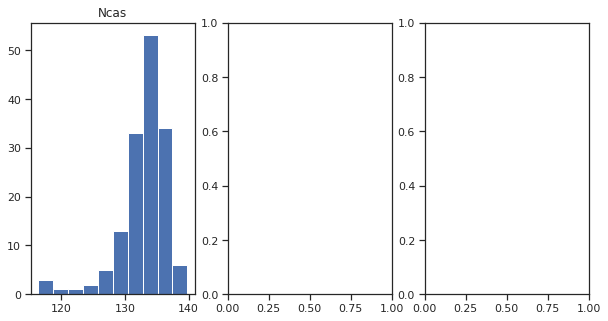

In [38]:
#Ncas Regev to YGOB: 

fig, axarr = plt.subplots(1,3, figsize=(10,5))

pairwise_scores = {}
for jj, spec in enumerate(['Ncas']):
    
    pairwise_score_fname = orth_dir_regev + os.path.normpath("AA_lists/" + spec + "_pairwise_score.pkl")

    with open(pairwise_score_fname,'rb') as file: 
        pairwise_score= pickle.load(file)
    
    pairwise_scores[spec] = pairwise_score
    #Use histogram to choose thresholds
    maxvals = []
    for genename_YGOB, options in pairwise_score.items(): 
        idxmax = options.idxmax()
        maxval = options[idxmax]
        maxvals.append(maxval)
    
    ax = axarr[jj]
    ax.hist(maxvals)
    ax.set_title(spec)

In [41]:
pairwise_scores['Ncas_regev']=pairwise_score

In [42]:
spec = 'Ncas_regev'

high_thresh_dict ={'Ncas':115, 'Smik': 121, 'Klac': 138, 'Ncas_regev':120}

high_thresh = high_thresh_dict[spec]
low_thresh = high_thresh
diff_thresh = 10.0

study1_study2_map = io_library.pairwise_hits_to_orth_dict(pairwise_scores[spec], high_thresh, low_thresh, diff_thresh)

More than one match Scas657.21d1, diff = 1.70
More than one match Scas698.13, diff = 0.60
More than one match Scas485.3d, diff = 6.60
More than one match Scas606.17, diff = 2.20
More than one match Scas547.4, diff = 0.30
More than one match Scas719.2, diff = 7.50
More than one match Scas522.4, diff = 7.40
More than one match Scas702.38, diff = 0.20
More than one match Scas517.1d, diff = 0.80
More than one match Scas4.1, diff = 2.60
More than one match Scas714.19, diff = 6.20
More than one match Scas721.96d, diff = 0.20
diff thresh never met Scas721.96d
More than one match Scas599.15, diff = 5.00
More than one match Scas479.4, diff = 10.20
More than one match Scas623.17d, diff = 2.60
diff thresh never met Scas623.17d
More than one match Scas695.4, diff = 1.00
More than one match Scas479.2, diff = 6.20
More than one match Scas719.59d, diff = 9.60
More than one match Scas716.60, diff = 3.40
More than one match Scas610.4, diff = 3.20
More than one match Scas681.11, diff = 5.20
More than on

In [ ]:
#Load YGOB KLAC list
#for Klac also add in all the known 1:1 genes

orth_dir_YGOB =  data_processing_dir + "ortholog_files_YGOB" + os.sep

kl_lookup_YGOB = io_library.read_orth_lookup_table('Klac','Scer', orth_dir_YGOB)
kl_genes_YGOB = set(kl_lookup_YGOB.keys())

#Load regev Klac list
orth_dir_regev = data_processing_dir + "ortholog_files_regev" + os.sep

kl_lookup_regev = io_library.read_orth_lookup_table('Klac','Scer', orth_dir_regev)
kl_genes_regev = set(kl_lookup_regev.keys())

for gene in list(kl_genes_YGOB & kl_genes_regev): 
    YGOB_regev[gene] = [gene]

In [92]:
orth_lookup_outputfname = os.path.normpath(data_processing_dir + 'ortholog_files_regev/' + spec + "_YGOB-" + spec + "_regev-orthologs.txt"  )

io_library.print_ortholog_file(orth_lookup_outputfname, YGOB_regev)

In [20]:
#Only need to do once
#Make Vpol-spec2 for Regev by combining Vpol-spec2 from YGOB to spec2_YGOB-spec2_regev. 
spec1 = 'Vpol'

for spec2 in ['Ncas','Smik','Klac']:
    spec1_spec2_regev = io_library.make_orth_file_YGOB_regev(spec1, spec2)


I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/expression_broad_data
data processing dir is /home/heineike/github/expression_broad_data/expression_data/
saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Vpol-Ncas-orthologs.txt
saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Vpol-Smik-orthologs.txt
saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Vpol-Klac-orthologs.txt


In [76]:
spec1 = 'Ncas'
spec2 = 'Vpol'
Ncas_Vpol_YGOB = io_library.write_YGOB_orth_lookup_table(spec1, spec2)

/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Ncas-Vpol-orthologs.txt


In [79]:
spec1 = 'Ncas'
spec2 = 'Vpol'

Ncas_Vpol_regev_YGOB = io_library.make_orth_file_regev_YGOB(spec1, spec2)

I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
base directory is /home/heineike/github/expression_broad_data
data processing dir is /home/heineike/github/expression_broad_data/expression_data/
saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Ncas-Vpol-orthologs.txt


In [59]:
#Reverse the dictionary and provide a list of genes in the regev column that are ambiguous and need to be looked up with a blast search
spec = 'Ncas'
YGOB_regev = io_library.read_orth_lookup_table(spec + '_YGOB', spec + '_regev', orth_dir_regev)

ambiguous_list = []
regev_YGOB = {}
for genename_YGOB, genenames_regev in YGOB_regev.items():
    if (len(genenames_regev)==1 )  & (genenames_regev[0] !='NONE'):
        genename_regev = genenames_regev[0]
        regev_YGOB[genename_regev] = [genename_YGOB]
    else: 
        if genenames_regev[0]!='NONE': 
            ambiguous_list.append(genenames_regev)
            
ambiguous_list_flat = list(chain.from_iterable(ambiguous_list))
regev_YGOB
        

{'Scas670.17': ['NCAS0J01150'],
 'Scas415.1': ['NCAS0C05160'],
 'Scas720.43': ['NCAS0D04030'],
 'Scas699.35': ['NCAS0G00770'],
 'Scas683.25': ['NCAS0A02310'],
 'Scas707.39': ['NCAS0C04150'],
 'Scas683.7': ['NCAS0A02130'],
 'Scas704.26': ['NCAS0A13570'],
 'Scas651.18': ['NCAS0I02840'],
 'Scas648.15': ['NCAS0C05510'],
 'Scas532.7': ['NCAS0G01310'],
 'Scas641.25': ['NCAS0H02900'],
 'Scas618.15': ['NCAS0D00710'],
 'Scas701.12': ['NCAS0E03370'],
 'Scas654.25': ['NCAS0G02230'],
 'Scas482.2': ['NCAS0A10120'],
 'Scas665.6': ['NCAS0B00930'],
 'Scas517.2': ['NCAS0A00420'],
 'Scas564.7': ['NCAS0B05090'],
 'Scas631.20': ['NCAS0A15130'],
 'Scas721.55': ['NCAS0B02470'],
 'Scas699.41': ['NCAS0G00700'],
 'Scas696.34': ['NCAS0C00490'],
 'Scas707.34': ['NCAS0C04100'],
 'Scas669.2': ['NCAS0D00960'],
 'Scas633.21': ['NCAS0I02160'],
 'Scas691.35': ['NCAS0H00230'],
 'Scas644.15': ['NCAS0D02100'],
 'Scas703.37': ['NCAS0A06110'],
 'Scas700.29d': ['NCAS0C01640'],
 'Scas721.28d': ['NCAS0B02160'],
 'Scas614.9': 

In [66]:
#Use new pairwise search results to update dictionary (except for keys that already existed - probably should
#have taken those out at the subset stage
regev_YGOB_old = regev_YGOB.copy()
for study1_gene in list(set(study1_study2_map.keys())-set(regev_YGOB.keys())):
    regev_YGOB[study1_gene] = study1_study2_map[study1_gene]

In [71]:
spec='Ncas'
orth_lookup_outputfname = os.path.normpath(data_processing_dir + 'ortholog_files_regev/' + spec + "_regev-" + spec + "_YGOB-orthologs.txt"  )

io_library.print_ortholog_file(orth_lookup_outputfname, regev_YGOB)

In [ ]:
#Ncas to SCer: add NONE for items where there is no match (just missing and causing Key errors before)
#NOte - best to use the file on Ben's laptop - I made a few manual changes before adding the None's
orth_dir_regev = data_processing_dir + "ortholog_files_regev" + os.sep
Ncas_Scer_regev = io_library.read_orth_lookup_table('Ncas','Scer', orth_dir_regev)
Ncas_regev_Ncas_YGOB = io_library.read_orth_lookup_table('Ncas_regev','Ncas_YGOB', orth_dir_regev)

Ncas_Scer_regev_new = Ncas_Scer_regev.copy()

for Ncas_gene_regev in list(set(Ncas_regev_Ncas_YGOB.keys())-set(Ncas_Scer_regev.keys())): 
    Ncas_Scer_regev_new[Ncas_gene_regev] = ['NONE']

Ncas_Scer_regev_new

spec1='Ncas'
spec2='Scer'
orth_lookup_outputfname = os.path.normpath(data_processing_dir + 'ortholog_files_regev/' + spec1 + "-" + spec2 + "-orthologs.txt"  )

io_library.print_ortholog_file(orth_lookup_outputfname, Ncas_Scer_regev_new)

In [81]:
#Ncas -> Smik and SCer -> Smik (the regev orthologs don't map)

#First make YGOB file (if not already made)
spec2 = 'Smik'
for spec1 in ['Scer', 'Ncas']:
    spec1_Smik_YGOB = io_library.write_YGOB_orth_lookup_table(spec1, spec2)

/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Scer-Smik-orthologs.txt
/home/heineike/github/expression_broad_data/expression_data/ortholog_files_YGOB/Ncas-Smik-orthologs.txt


In [83]:
#next make file for translation to regev names
spec2 = 'Smik'

for spec1 in ['Scer', 'Ncas']:
    spec1_Smik_regev_YGOB = io_library.make_orth_file_YGOB_regev(spec1, spec2)

saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Scer-Smik-orthologs.txt
saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Ncas-Smik-orthologs.txt


In [92]:
#Ncas file needs to have its keys translated as well. 
spec1 = 'Ncas'
spec2 = 'Smik'

spec1_spec2_YGOB_regev = io_library.make_orth_file_YGOB_regev(spec1, spec2)

spec1_regev_YGOB = io_library.read_orth_lookup_table(spec1 + '_regev', spec1 + '_YGOB', orth_dir_regev)


saving /home/heineike/github/expression_broad_data/expression_data/ortholog_files_regev/Ncas-Smik-orthologs.txt


In [97]:
spec1_spec2_YGOB_regev
spec1_regev_YGOB

spec1_spec2_regev_regev = {}
for spec1_gene_regev, spec1_genes_YGOB in spec1_regev_YGOB.items():
    if spec1_genes_YGOB[0]=='NONE':
        spec1_spec2_regev_regev[spec1_gene_regev] = ['NONE']
    else: 
        spec2_genes_YGOB = []
        for spec1_gene_YGOB in spec1_genes_YGOB: 
            spec2_gene_YGOB = spec1_spec2_YGOB_regev[spec1_gene_YGOB]
            if not(spec2_gene_YGOB[0]=='NONE'):
                spec2_genes_YGOB.append(spec2_gene_YGOB)
        if len(spec2_genes_YGOB)==0:
            spec1_spec2_regev_regev[spec1_gene_regev]=['NONE']
        else: 
            spec1_spec2_regev_regev[spec1_gene_regev]=list(chain.from_iterable(spec2_genes_YGOB))
            
spec1_spec2_regev_regev

orth_lookup_outputfname = os.path.normpath(data_processing_dir + 'ortholog_files_regev/' + spec1 + "-" + spec2 + "-orthologs.txt"  )

io_library.print_ortholog_file(orth_lookup_outputfname, spec1_spec2_regev_regev)